# Breast Cancer prediction machine learning algorithm using logistic regression

The data was obtained from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original) Data description can be found at https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names

# Objective 
Predict breast cancer based on a set of cytology features (clump thickness, uniformity of cell size, uniformity of cell shape, marginal adhesion, single epithelial cell size, bare nuclei, bland chromatin, normal nuceloli, mitosis).

# Data Preprocessing 
Missing values with "?" were replaced with "NaN" to make it easy to find and delete rows with missing data. Labels were added in the first row based on the data description. Values in the field classs was replaced as follows 2=0(benign) 4=1 (malignant /cancer). No other pre-processing was done. The data file "wisconsin_breast_cancer.csv" is present in this same GitHub folder.

In [1]:
# Importing pandas to read CSV file

import pandas as pd

# Read breast cancer csv file to pandas data frame data
data = pd.read_csv('wisconsin_breast_cancer.csv')

# Display the first 5 rows of the csv file
data.head()

,id,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


In [2]:
data.shape # It is always a good idea to understand your data

(699, 11)

# Delete rows with missing data

In [3]:
data.isnull().sum() # Find out how many cells have missing values
# Looks like the field nucleoli has 16 missing values

id            0
thickness     0
size          0
shape         0
adhesion      0
single        0
nuclei       16
chromatin     0
nucleoli      0
mitosis       0
class         0
dtype: int64

In [4]:
data=data.dropna(how='any') # Dropping any rows that has missing values

previously we had 699 rows. The above code deleted 16 rows with missing values and now we have 683 rows

In [5]:
#creating feature data set
# Here we are going to select feature fileds and assign it to a pandas data frame x. 
# We do not need Id. So it was dropped
x=data[['thickness','size','shape','adhesion','single','nuclei','chromatin','nucleoli','mitosis']]

In [6]:
x.head() # printing the first 5 rows to see whether we got all the features

,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [7]:
# Now we are going to extract the 'class' field from 'data' and store it in variable y
# This is the variable that we want to predict 0= no cancer 1 = cancer 
y=data['class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

# Getting ready to do classification
Import cross validation from sklearn for test trian split. Then import logistic regression from sklearn.

The goal is to spilit our data into two. A traning data set and a testing set. We will use the training set to train our logistic regression model. After that, we will use this model to predict cancer occurance from the features in the testing set. Since we already know the occurance of cancer in the testing set we can comapre it with the predicted vaules to benchmark our model.

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [9]:
# train logistic regression model 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
# make predictions based on x_test and store it to y_pred_class
y_pred_class=logreg.predict(x_test) 

In [11]:
# Now let us see how our model is performing. 
# We will start with accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_class)

0.9298245614035088

Not bad at all. 92.9% of the time our model was able to identify breast cancer based on the training data 

Now let us see how our "intelligent" model compare to a dumb model which predicts "o" or "not cancer" all the time because it the most prevelent class

In [12]:
y_test.value_counts() # as you see "0" is more prevalent

0    107
1     64
Name: class, dtype: int64

In [13]:
# Now let us see the percentage of "o" in y_test. This will be the accuracy of a dumb model that predicts 0 
# all the time
1-y_test.mean()

0.6257309941520468

# Now let us create a confusion matrix to identify sensitivity specificity & all the other good statistical stuff

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred_class)

array([[103,   4],
       [  8,  56]])

In [ ]:
#  let us see what this means
#
#                Predicted 0    Predicted 1    Total
#                                
#Actual  0        103              4            107
#Actual  1          8             56             64           
#Total            111             60

In [15]:
confusion = confusion_matrix(y_test, y_pred_class)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [16]:
# Let us see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.875

In [17]:
# Our model's sensitivity is 87.5%

In [18]:
# Let us calculate specificity
TN / float(TN+FP)

0.9626168224299065

In [19]:
# Looks like our model has pretty good specificity 96.2%

In [20]:
# Calculate false postive rate - predicting cancer when pt does not have cancer
FP/ float(TN+FP)

0.037383177570093455

In [21]:

# pretty awesome 3.7%

In [22]:
# precison - when it is predicting cancer how precise is it 
# positive predictive value 
TP / float(TP+FP)

0.9333333333333333

In [23]:

# 93.3% of the time

In [24]:
# Random Forest en dataset de entrenamiento
from sklearn.ensemble import RandomForestClassifier
randm_frst = RandomForestClassifier()
randm_frst.fit(x_train, y_train)

#Predicción
y_frst = randm_frst.predict(x_test)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(0.5, 1.05, 'Confusion matrix para Random Forest')

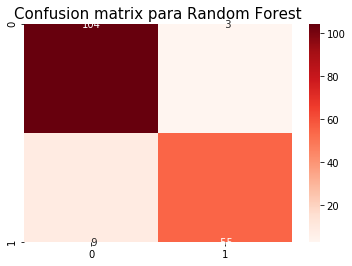

In [25]:
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
#Confusion matrix
from sklearn.metrics import confusion_matrix
frst_cm = confusion_matrix(y_test, y_frst)
sns.heatmap(frst_cm,annot=True,fmt='3.0f',cmap="Reds")
plt.title('Confusion matrix para Random Forest', y=1.05, size=15)

In [26]:
#Reporte de Clasificación
from sklearn.metrics import classification_report
frst_cr = classification_report(y_test, y_frst)
print(frst_cr)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       107
           1       0.95      0.86      0.90        64

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



In [27]:
#K-Nearest Neighbors en dataset de entrenamiento
from sklearn.neighbors import KNeighborsClassifier
kneighbors = KNeighborsClassifier()
kneighbors.fit(x_train, y_train)

#Predicción
y_knn = kneighbors.predict(x_test)

In [28]:
# Reporte de Clasificación
from sklearn.metrics import classification_report
knn_cr = classification_report(y_test, y_knn)
print(knn_cr)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       107
           1       0.94      0.94      0.94        64

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [29]:

from sklearn.linear_model import LogisticRegression
log_rg = LogisticRegression()
log_rg.fit(x_train, y_train)

# Predicción
y_log_rg = log_rg.predict(x_test)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 1.05, 'Confusion matrix para Regresión Logistica')

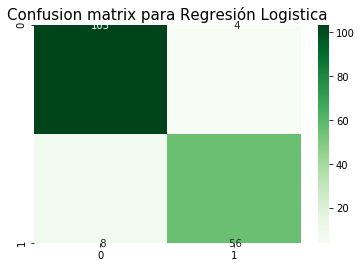

In [30]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_log_rg)
sns.heatmap(cm,annot=True,fmt='3.0f',cmap="Greens")
plt.title('Confusion matrix para Regresión Logistica', y=1.05, size=15)

In [31]:
from sklearn.metrics import f1_score
f1_log = f1_score(y_test, y_log_rg)
f1_frst = f1_score(y_test, y_frst)
f1_knn = f1_score(y_test, y_knn)

In [32]:
from pandas import DataFrame
scores = {'Model':  ['Regresión Logistica','Random Forest', 'KNN'], 
          'f1 score': [f1_log, f1_frst, f1_knn]}
f1_scores = DataFrame (scores, columns = ['Model','f1 score'])
f1_scores

,Model,f1 score
0,Regresión Logistica,0.903226
1,Random Forest,0.901639
2,KNN,0.937500


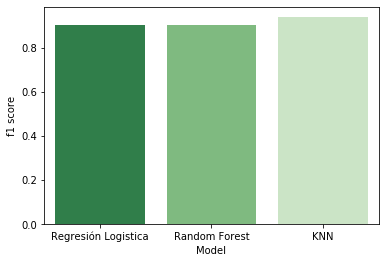

In [33]:

sns.barplot(x="Model", y="f1 score", data=f1_scores, palette="Greens_r")